In [2]:
import time 
import numpy as np
import sys

In [3]:
sys.path.append('/Users/jairmartinez/Documents/UPY/7th/HPC/Portfolio/Portfoliocode/Scripts/Cython_All')

In [12]:
from CPython_0.CPython import update as update_python
from Cython_1_0.Cython_1 import update as update_c1
from Cython_2_0.Cython_2 import update as update_c2
from Cython_3_0.Cython_3 import update as update_c3
from Cython_4_0.Cython_4 import update as update_c4


In [9]:

def initialize_lattice(lattice_size=300):
    """ 
    Function to initialize the lattice state for testing
    """
    # Initialize a lattice as a cross
    lattice = np.zeros((lattice_size, lattice_size), dtype=int)
    lattice[lattice_size // 2, :] = 1
    lattice[:, lattice_size // 2] = 1
    return lattice


In [10]:
def test_performance(update_function, lattice_size=300, iterations=300):
    lattice = initialize_lattice(lattice_size)
    start_time = time.time()
    for _ in range(iterations):
        lattice = update_function(lattice)
    end_time = time.time()

    return end_time - start_time


In [13]:
cpython_runtime = test_performance(update_python)
cython_1_runtime = test_performance(update_c1)
cython_2_runtime = test_performance(update_c2)
cython_3_runtime = test_performance(update_c3)
cython_4_runtime = test_performance(update_c4)


In [14]:
print(f"Python Runtime: {cpython_runtime:.2f} seconds")
print(f"Cython 1 Runtime: {cython_1_runtime:.2f} seconds")
print(f"Cython 2 Runtime: {cython_2_runtime:.2f} seconds")
print(f"Cython 3 Runtime: {cython_3_runtime:.2f} seconds")
print(f"Cython 4 Runtime: {cython_4_runtime:.2f} seconds")


Python Runtime: 12.32 seconds
Cython 1 Runtime: 8.57 seconds
Cython 2 Runtime: 4.59 seconds
Cython 3 Runtime: 4.18 seconds
Cython 4 Runtime: 3.90 seconds


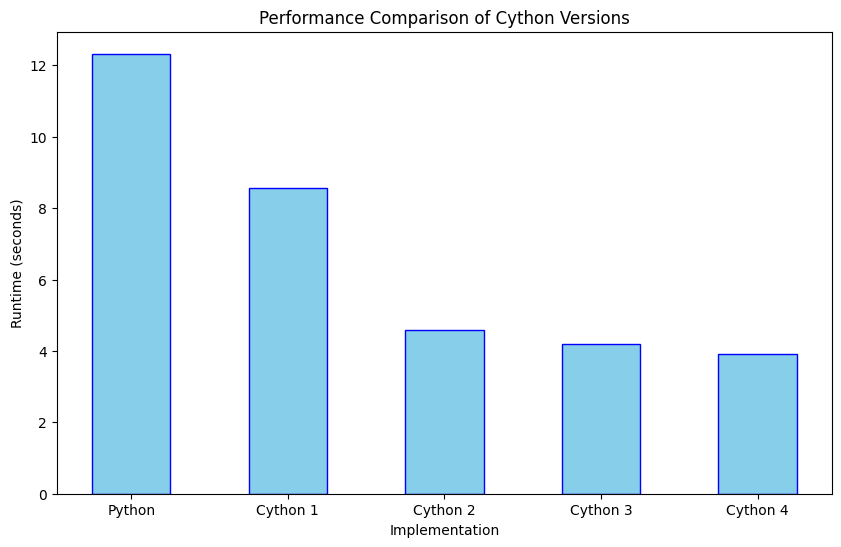

In [20]:
import matplotlib.pyplot as plt

# Data preparation
labels = ['Python','Cython 1', 'Cython 2', 'Cython 3', 'Cython 4']
runtimes = [cpython_runtime, cython_1_runtime, cython_2_runtime, cython_3_runtime, cython_4_runtime]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, runtimes, width=0.5, color='skyblue', edgecolor='blue')
plt.xlabel('Implementation')
plt.ylabel('Runtime (seconds)')
plt.title('Performance Comparison of Cython Versions')
plt.show()


## Summary of Improvements through Cython Optimization

### Python Version
- **Description**: Baseline implementation using pure Python.
- **Key Points**: 
  - Serves as the starting point for optimization.
  - Faces the inherent overhead of Python's dynamic typing and interpreted execution.

### Cython 1
- **Description**: Direct translation of the Python code into Cython without specific optimizations.
- **Key Points**: 
  - Some speed improvement from compiling to C, though minimal due to lack of Cython-specific optimizations.
  - Still includes overhead due to lack of static typing and optimization.

### Cython 2
- **Description**: Introduces static typing for local variables within functions using `cdef`.
- **Key Points**: 
  - Significant reduction in the overhead of dynamic type checking.
  - Leads to faster execution by allowing Cython to generate more efficient C code.

### Cython 3
- **Description**: Extends static typing to function arguments and return types.
- **Key Points**: 
  - Optimizes function calls by reducing Python calling convention overhead.
  - Allows for further improvements in execution speed by generating even more efficient C code.

### Cython 4
- **Description**: Incorporates compiler directives to disable bounds checking and wraparound.
- **Key Points**: 
  - Major performance gains by removing runtime checks for array bounds and negative index wraparound.
  - Shifts the responsibility for managing array bounds to the developer, requiring careful coding to avoid errors.
